<h4> Importing the necessary libraries </h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#To get rid of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('data.csv', error_bad_lines = False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
raw_data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
raw_data.shape

(669640, 2)

In [5]:
raw_data['strength'].unique()

array([1, 2, 0], dtype=int64)

<h4> Checking for missing values </h4>

In [6]:
raw_data.isnull().sum()

password    1
strength    0
dtype: int64

In [7]:
raw_data[raw_data['password'].isna()]

,password,strength
367579,NaN,0


In [8]:
raw_data.dropna(inplace = True)

In [9]:
raw_data.isna().sum()

password    0
strength    0
dtype: int64

<h4> To check the different categories of password strength </h4>

<AxesSubplot:xlabel='strength', ylabel='count'>

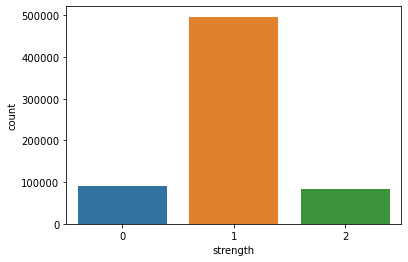

In [10]:
sns.countplot(raw_data['strength'])

From the above plot, predicting with such dataset will result to a bias prediction as the dataset is imbalance.

#### Transforming the dataset into an array for easy preprocessing

In [11]:
password_tuple = np.array(raw_data)

In [12]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

<h4> Shuffling the dataset for robustness </h4>

In [13]:
import random
random.shuffle(password_tuple)

In [14]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [15]:
x

['kzde5577',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'kzde5577',
 'megzy123',
 'kino3434',
 'lamborghin1',
 'v1118714',
 'AVYq1lDE4MgAZfNt',
 'as326159',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'kino3434',
 'kzde5577',
 '52558000aaa',
 '612035180tok',
 'as326159',
 'megzy123',
 'megzy123',
 'kino3434',
 'megzy123',
 'idofo673',
 'idofo673',
 'cigicigi123',
 'kino3434',
 'idofo673',
 'faranumar91',
 'idofo673',
 'megzy123',
 'g067057895',
 '52558000aaa',
 'u6c8vhow',
 'g067057895',
 'intel1',
 'as326159',
 'v1118714',
 'elyass15@ajilent-ci',
 'universe2908',
 'exitos2009',
 'sbl571017',
 'sbl571017',
 'lsdlsd1',
 'memjan123',
 'memjan123',
 'fk9qi21m',
 'jytifok873',
 'faranumar91',
 'trabajonet9',
 'faranumar91',
 'ok>bdk',
 'AVYq1lDE4MgAZfNt',
 '0169395484a',
 'WUt9IZzE0OQ7PkNE',
 'czuodhj972',
 'pHyqueDIyNQ8vmhb',
 'intel1',
 'yqugu927',
 'universe2908',
 'megzy123',
 'cigicigi123',
 'a2531106',
 'b4NbTxDEyNgG141J',
 'ok>bdk',
 'olmaz.',
 'openup12',
 'openup12',
 'jerusalem

<h4> creating a custom function to split input into characters of list </h4>

In [16]:
def word_divide_char(inputs):
    return list(inputs)

In [17]:
word_divide_char('jerusalem393')

['j', 'e', 'r', 'u', 's', 'a', 'l', 'e', 'm', '3', '9', '3']

<h4> importing TF-IDF vectorizer </h4>

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [20]:
X = vectorizer.fit_transform(x)

In [21]:
X.shape

(669639, 131)

The columns increased because it's now in form of a vector 

In [22]:
vectorizer.get_feature_names()

['\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚',
 '…']

In [23]:
#To get the importance of a vector
first_vector = X[0]
first_vector

<1x131 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [24]:
#The transpose of first_vector
first_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56663446],
        [0.        ],
        [0.59125713],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

#### Sorting the data by importance

In [25]:
df=pd.DataFrame(first_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591257
5,0.566634
z,0.336577
k,0.291856
d,0.285980
...,...
9,0.000000
8,0.000000
6,0.000000
4,0.000000


#### Balancing the dataset for accurate prediction using 'Imblearn-RandomUnderSampler'

In [26]:
import imblearn

In [27]:
# To get the count of the resampled data
from collections import Counter

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state=42)

In [30]:
x_rus, y_rus = rus.fit_resample(X, y)

In [31]:
# Printing the shape of the resampled data
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({1: 496643, 0: 90464, 2: 82532})
Resample dataset shape Counter({0: 82532, 1: 82532, 2: 82532})


In [32]:
df = pd.DataFrame(y_rus)

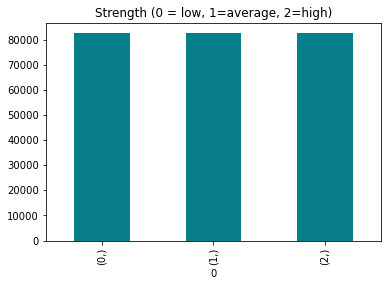

In [33]:
ax = df.value_counts().plot(kind='bar', title='Strength (0 = low, 1=average, 2=high)', color='#087E8B')

From the above plot, the data is balanced and optimal for prediction.

#### Splitting the data into train and test data 
Train -> To learn the relationship within the data

Test -> The data will be unseen by the model and will be used to test the model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2)

In [36]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:',len(y_train))
print('y_test.shape:', len(y_test))

X_train.shape: (198076, 131)
X_test.shape: (49520, 131)
y_train.shape: 198076
y_test.shape: 49520


#### Using LogisticRegression Algorithm to build the model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(random_state=0, multi_class='multinomial')

In [39]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [40]:
#Testing the model with a  password 
dt =np.array(['@Ruth1234%'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [41]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 2, ..., 1, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[13970  2639    30]
 [ 3377 11112  1919]
 [  260  1495 14718]]


In [44]:
Accuracy_sc = round(accuracy_score(y_test,y_pred)*100)
txt = "Accuracy:{}%"
print(txt.format(Accuracy_sc))

Accuracy:80%


LogisticRegression Algorithm built the model with an accuracy of 80%

A different algorithm will be used for better performance

#### Using RandomForestClassifier for better performance

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()

In [50]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
Accuracy = round(rfc.score(X_test, y_test)*100)
txt = "Accuracy:{}%"
print(txt.format(Accuracy))

Accuracy:97%


The model was further built with RandomForestClassifier with an accuracy of 97%.

The model is optimal and fit to be used for predictions using other datasets.